<a href="https://colab.research.google.com/github/SeanPatt45/mgmt467-analytics-portfolio/blob/main/Labs/Week5_DataViz_Dashboarding_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGMT 467 — Week 5: Data Visualization & Dashboarding

Instructor: **Prof. Alok R. Chaturvedi**  
Modality: **Guided Inquiry (Tuesday)** + **Hands-on Lab (Thursday)**  
Prepared: 2025-09-23  

---
### Learning Objectives
1. Distinguish **exploratory** vs **explanatory** visualization.  
2. Match common **chart types** to the **questions** they answer.  
3. Design **airline KPIs** and select appropriate visuals.  
4. Use **Gemini** to generate Matplotlib/Seaborn code in Colab.  
5. Build an **interactive dashboard** in Looker Studio using BigQuery/CSV.


## Tuesday (Concepts) — Guided Inquiry

**Instructions:** Answer directly in this notebook. Use short paragraphs and bullet points. When helpful, sketch chart ideas using ASCII or quick scribbles.

### Q1 — Exploratory vs. Explanatory
**Prompt:** *"Explain the difference between exploratory and explanatory visualization."*\
**Hints:** Consider audience, purpose, level of polish, and how much iteration you expect.

📝 **Your response:**

- Exploratory: focuses on the intital discovery, sense making and identifying patterns or potential relationships. Serving mainly data scientest and analysts
- Explanatory: focuses on pre determined findings, narratives or insights to an audience, often key descion makers
- Diffrence: Exploratory aims to discover the story and explanatory aims to tell the story.

* * *
### Q2 — Chart Types & When to Use Them
**Prompt:** *"Describe 5 common chart types (e.g., bar, line, scatter, histogram, map) and the type of data analysis question each is best suited to answer."*  

For each chart, list: **Question archetype**, **Data shape**, **Pitfalls**, **Alternatives**.

📝 **Your response (template):**
1. **Bar:**  
   - Question archetype: Comparison and ranking  
   - Data shape: One categorical variable on the X-axis and one measure on the Y  
   - Pitfalls: truncated axis and improper ordering  
   - Alternatives: Horizontal chart and bubble chart
2. **Line:**
   - Question archetype: Trend & Change
   - Data shape: One continous quantitative variable and one qualatative variable
   - Pitfalls: Clutter and irregular intervals
   - Alternatives: Area and Slope charts
3. **Scatter:**  
   - Question archetype: Relationship and correlation  
   - Data shape: two paird quantative variables
   - Pitfalls: Overplotting and spurious correlation
   - Alternatives: bubble chart and heat map
4. **Histogram:**  
   - Question archetype: Distribution and frequency
   - Data shape: single qualitative variable partitioned into bins
   - Pitfalls: Bin size and misidentification
   - Alternatives: Density and Box plots
5. **Map:**
   - Question archetype: spatial analysis
   - Data shape: Geogrpahic boundaries linked to a single qualatiative metric
   - Pitfalls: area bias and unnormalized data
   - Alternatives: proportional symbol map and heatmap

* * *
### Q3 — Airline Executive Dashboard KPIs
**Prompt:** *"Your goal is to create a dashboard for an airline executive. Brainstorm 5 Key Performance Indicators (KPIs) that should be on this dashboard. For each KPI, suggest the best chart type to visualize it."*

Suggested KPI ideas to consider (customize them): On-Time Rate, Average Delay Minutes, Cancellation Rate, Load Factor, Yield (Revenue per Passenger Mile), Completion Factor, Net Promoter Score (if available), Revenue, Cost per Available Seat Mile (CASM).

📝 **Your response (template):**
1. KPI: **On-Time Rate**
   - Why it matters: Measures the percentage of flights arriving within a specified time of their scheduled arrival. It's a key indicator of operational efficiency and customer satisfaction.
   - Best chart: **Bar Chart** to compare on-time performance across different carriers or routes.
   - Drill-down fields: Carrier, Route (Origin-Dest), Month
2. KPI: **Average Delay Minutes**
   - Why it matters: Indicates the typical length of flight delays. High average delays point to potential operational bottlenecks or external factors impacting schedules.
   - Best chart: **Line Chart** to show trends over time (daily, weekly, monthly) and identify periods with significant delays.
   - Drill-down fields: Date, Carrier, Origin, Dest
3. KPI: **Cancellation Rate**
   - Why it matters: Represents the percentage of scheduled flights that are canceled. High cancellation rates significantly impact passenger plans and airline costs.
   - Best chart: **Bar Chart** to compare cancellation rates by carrier or origin airport. Could also use a **Line Chart** to track over time.
   - Drill-down fields: Carrier, Origin, Date
4. KPI: **Load Factor**
   - Why it matters: The percentage of available seats that are occupied by passengers. A key metric for revenue management and profitability.
   - Best chart: **Horizontal Bar Chart** for comparing load factors across different routes or aircraft types. A **Line Chart** can show trends over time.
   - Drill-down fields: Route (Origin-Dest), Aircraft Type (if available), Month
5. KPI: **Yield (Revenue per Passenger Mile)**
   - Why it matters: Measures the average revenue generated per passenger mile flown. It's a key indicator of pricing strategy effectiveness and profitability on different routes.
   - Best chart: **Scatter Plot** to see the relationship between yield and other factors like distance or load factor. **Bar Chart** to compare yield by route or carrier.
   - Drill-down fields: Route (Origin-Dest), Carrier, Month, Distance

---
## Thursday (Practice) — Colab, Gemini, & Looker Studio

You will:
1) Use **Gemini** in Colab to generate visualization code (Matplotlib/Seaborn).  
2) Use a **synthetic airline dataset** (provided below) *or* connect your own BigQuery data.  
3) Build a **Looker Studio** dashboard for your KPIs.

### Option A — Use Gemini Side Panel in Colab
Open the **Gemini** side panel in Colab ("Extensions" or the right sidebar). Ask it to generate Python code given your prompts and the DataFrame you have in memory. Paste/execute the generated code in new cells.

### Option B — Programmatic Gemini (optional)
If you prefer code, you can install the Generative AI SDK and call Gemini with an API key. (We will not store keys in this notebook.)

> **Reminder:** This course emphasizes **AI-assisted coding**—focus on specifying *clear prompts* and then **reviewing and editing** the generated code for correctness, readability, and ethics.


In [ ]:
# (Optional) Environment setup — run if needed
%%capture
!pip install pandas numpy matplotlib seaborn pyarrow db-dtypes google-cloud-bigquery -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42)
print('✅ Environment ready')

### Create a Synthetic Airline Dataset (if you don't have one)
Use this dataset to prototype visualizations and dashboards. It contains realistic columns for the KPIs you defined. You can always swap in your BigQuery data later.


In [ ]:
# Generate a synthetic airline dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(467)

dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
origins = ['ATL','DFW','DEN','ORD','LAX','SEA','SFO','PHX','CLT','MCO']
dests =   ['JFK','LGA','BOS','SFO','LAX','SEA','MIA','IAH','IAD','PHL']

rows = []
for d in dates:
    for carrier in carriers:
        # number of flights per day per carrier
        n = np.random.randint(80, 140)
        for _ in range(n):
            o = np.random.choice(origins)
            de = np.random.choice(dests)
            if o == de:
                continue
            distance = np.random.randint(300, 2800)
            seats = np.random.choice([90,120,150,180,210])
            load_factor = np.clip(np.random.normal(0.82, 0.07), 0.55, 0.98)
            pax = int(seats * load_factor)
            dep_delay = int(np.random.normal(8, 15))
            arr_delay = dep_delay + int(np.random.normal(0, 12))
            dep_delay = max(dep_delay, -5)
            arr_delay = max(arr_delay, -10)
            cancelled = np.random.rand() < 0.025
            diverted = np.random.rand() < 0.005
            revenue = pax * np.random.uniform(120, 420)
            casm = np.random.uniform(0.08, 0.16)  # cost per available seat mile
            cost = casm * seats * distance
            fuel_burn = distance * np.random.uniform(3.0, 4.5)  # gallons per seat-mile proxy
            nps = np.random.normal(35, 15)  # if you want a customer metric proxy
            rows.append({
                'date': d,
                'carrier': carrier,
                'origin': o,
                'dest': de,
                'distance_miles': distance,
                'seats': seats,
                'passengers': pax,
                'dep_delay_min': dep_delay,
                'arr_delay_min': arr_delay,
                'cancelled': int(cancelled),
                'diverted': int(diverted),
                'revenue_usd': round(revenue, 2),
                'cost_usd': round(cost, 2),
                'fuel_burn_gal': round(fuel_burn, 1),
                'nps': round(nps, 1)
            })

df_flights = pd.DataFrame(rows)

# Derived KPIs
df_flights['on_time'] = (df_flights['arr_delay_min'] <= 15).astype(int)
df_flights['load_factor'] = (df_flights['passengers'] / df_flights['seats']).round(3)
df_flights['yield_usd_per_pax_mile'] = (df_flights['revenue_usd'] / (df_flights['passengers'] * df_flights['distance_miles']).clip(lower=1)).round(4)
df_flights['asm'] = df_flights['seats'] * df_flights['distance_miles']  # available seat miles
df_flights['casm'] = (df_flights['cost_usd'] / df_flights['asm']).round(4)
df_flights['month'] = df_flights['date'].dt.to_period('M').astype(str)

df_flights.head()

,date,carrier,origin,dest,distance_miles,seats,passengers,dep_delay_min,arr_delay_min,cancelled,...,revenue_usd,cost_usd,fuel_burn_gal,nps,on_time,load_factor,yield_usd_per_pax_mile,asm,casm,month
0,2024-01-01,AA,LAX,IAH,444,180,160,-5,-10,0,...,26076.49,8301.98,1904.6,53.4,1,0.889,0.3671,79920,0.1039,2024-01
1,2024-01-01,AA,SEA,PHL,601,150,141,10,7,0,...,17561.91,8739.75,2237.5,60.9,1,0.940,0.2072,90150,0.0969,2024-01
2,2024-01-01,AA,LAX,IAD,749,120,100,13,22,0,...,15355.61,12241.65,3076.5,54.1,0,0.833,0.2050,89880,0.1362,2024-01
3,2024-01-01,AA,DFW,BOS,2153,210,169,13,14,0,...,42122.37,65961.23,6642.2,37.0,1,0.805,0.1158,452130,0.1459,2024-01
4,2024-01-01,AA,CLT,SEA,558,90,75,9,-5,0,...,26418.88,7144.23,2142.3,56.3,1,0.833,0.6313,50220,0.1423,2024-01


### Use Gemini to Generate Visualization Code
Copy/paste these **prompts** into Gemini (Colab side panel). After it generates code, paste it into a new cell and run. **Inspect and fix** anything that looks off.

#### Prompt A — On-Time Rate by Carrier (Bar Chart)
```
You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.
```

#### Prompt B — Average Arrival Delay over Time (Line Chart)
```
Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.
```

#### Prompt C — Delay Distribution (Histogram)
```
Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.
```

#### Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
```
Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.
```

#### Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
```
Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.
```


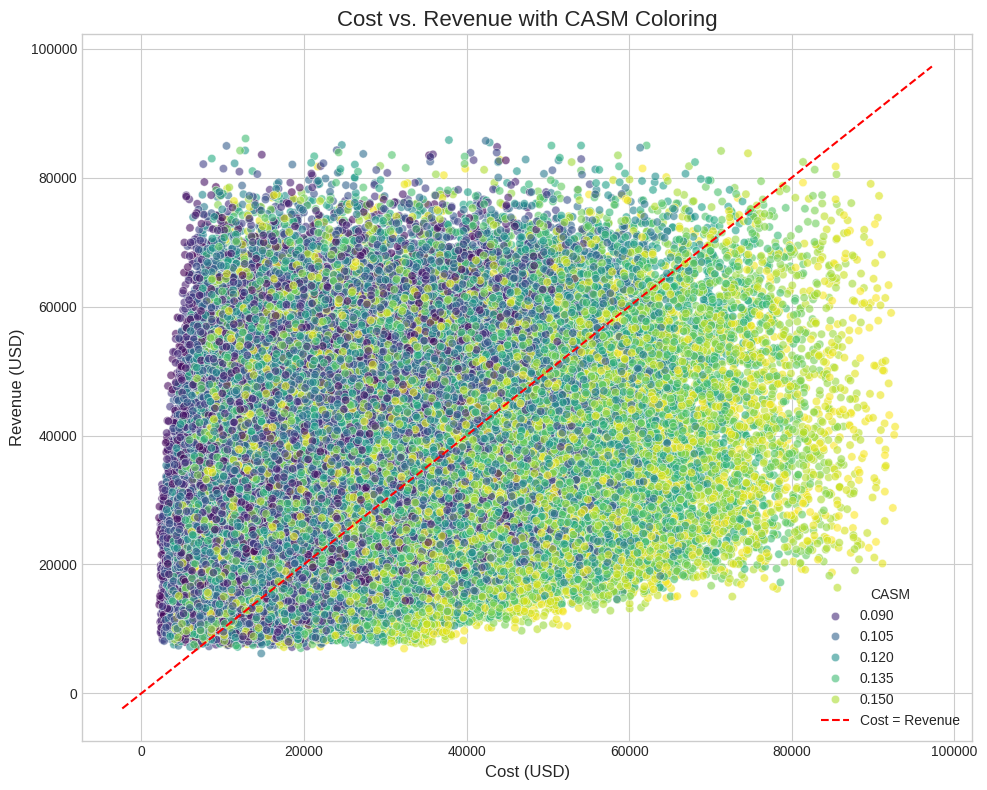

In [ ]:
# Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)

# Plotting
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df_flights, x='cost_usd', y='revenue_usd', hue='casm', palette='viridis', alpha=0.6)

plt.title('Cost vs. Revenue with CASM Coloring', fontsize=16)
plt.xlabel('Cost (USD)', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)

# Add a diagonal y=x reference line
x = np.linspace(*plt.xlim())
plt.plot(x, x, color='red', linestyle='--', label='Cost = Revenue')

plt.legend(title='CASM')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3000400599.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_load_factor_by_route.values, y=mean_load_factor_by_route.index, palette='viridis')


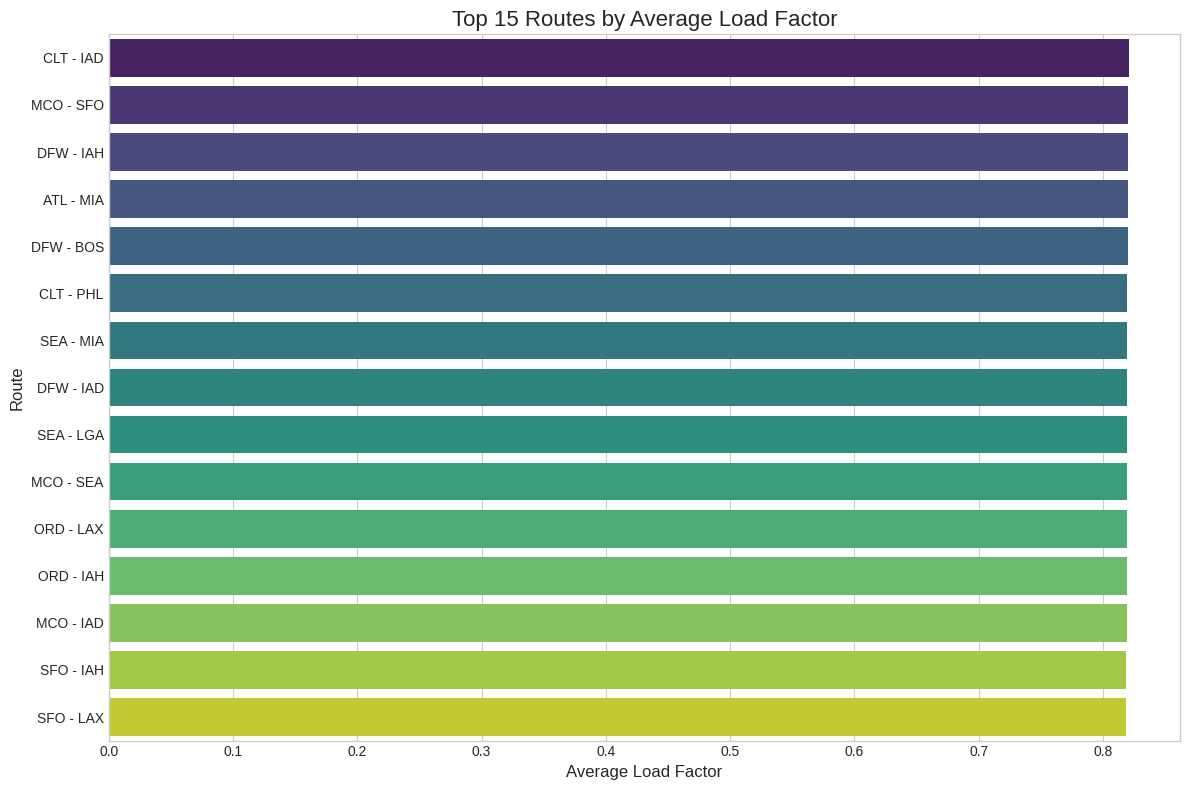

In [ ]:
# Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)

# Compute mean load factor by route (origin-dest pair)
df_flights['route'] = df_flights['origin'] + ' - ' + df_flights['dest']
mean_load_factor_by_route = df_flights.groupby('route')['load_factor'].mean().sort_values(ascending=False).head(15)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_load_factor_by_route.values, y=mean_load_factor_by_route.index, palette='viridis')

plt.title('Top 15 Routes by Average Load Factor', fontsize=16)
plt.xlabel('Average Load Factor', fontsize=12)
plt.ylabel('Route', fontsize=12)
plt.tight_layout()
plt.show()

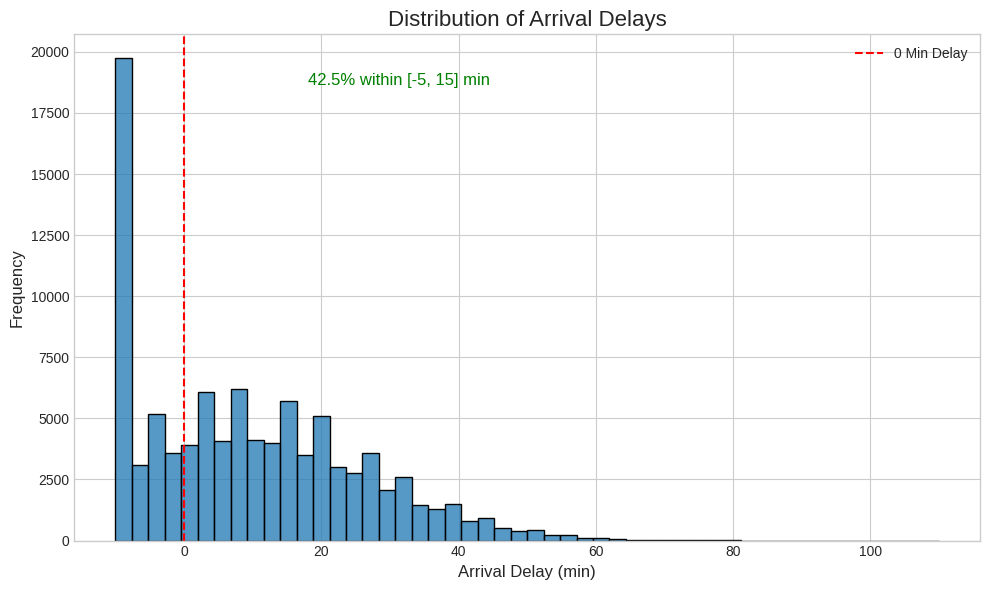

In [ ]:
# Prompt C — Delay Distribution (Histogram)

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_flights['arr_delay_min'], bins=50, kde=False)

# Add vertical reference line at 0
plt.axvline(0, color='red', linestyle='--', label='0 Min Delay')

# Annotate percent of flights within [-5, 15] minutes
on_time_flights = df_flights[(df_flights['arr_delay_min'] >= -5) & (df_flights['arr_delay_min'] <= 15)]
percent_on_time = len(on_time_flights) / len(df_flights) * 100

plt.text(18, plt.ylim()[1] * 0.9, f'{percent_on_time:.1f}% within [-5, 15] min', color='green', fontsize=12)

plt.title('Distribution of Arrival Delays', fontsize=16)
plt.xlabel('Arrival Delay (min)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

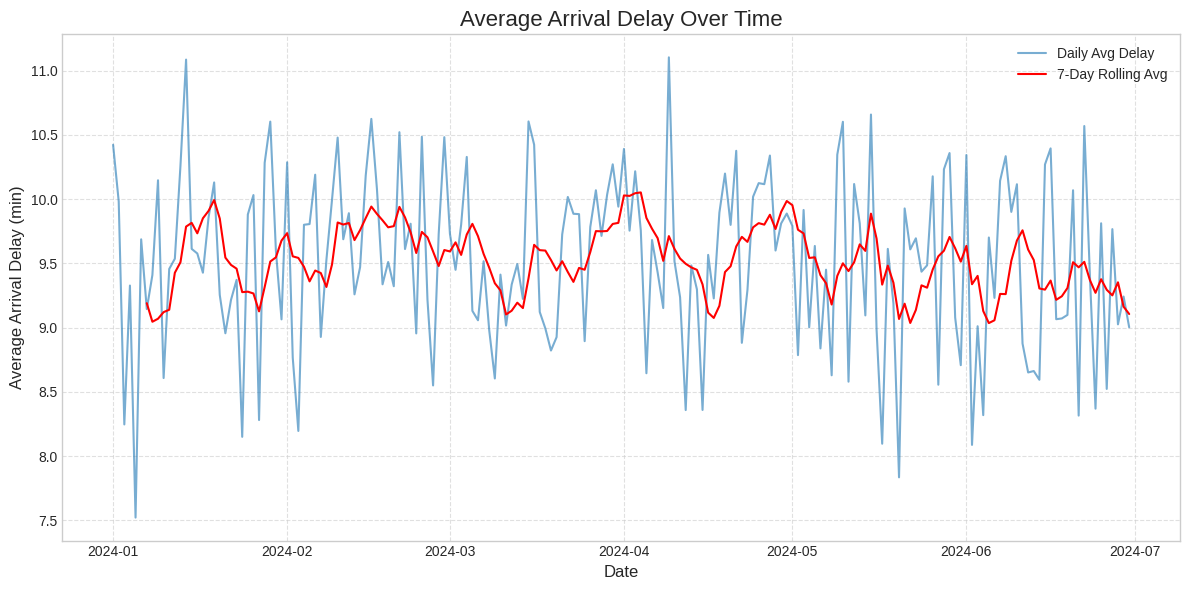

In [ ]:
# Prompt B — Average Arrival Delay over Time (Line Chart)

# Aggregate to daily average arrival delay
daily_avg_delay = df_flights.groupby('date')['arr_delay_min'].mean().reset_index()

# Calculate 7-day rolling average
daily_avg_delay['rolling_avg_delay'] = daily_avg_delay['arr_delay_min'].rolling(window=7).mean()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_avg_delay, x='date', y='arr_delay_min', label='Daily Avg Delay', alpha=0.6)
sns.lineplot(data=daily_avg_delay, x='date', y='rolling_avg_delay', label='7-Day Rolling Avg', color='red')

plt.title('Average Arrival Delay Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Arrival Delay (min)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-4020703261.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=on_time_rate_by_carrier.index, y=on_time_rate_by_carrier.values, palette='viridis')


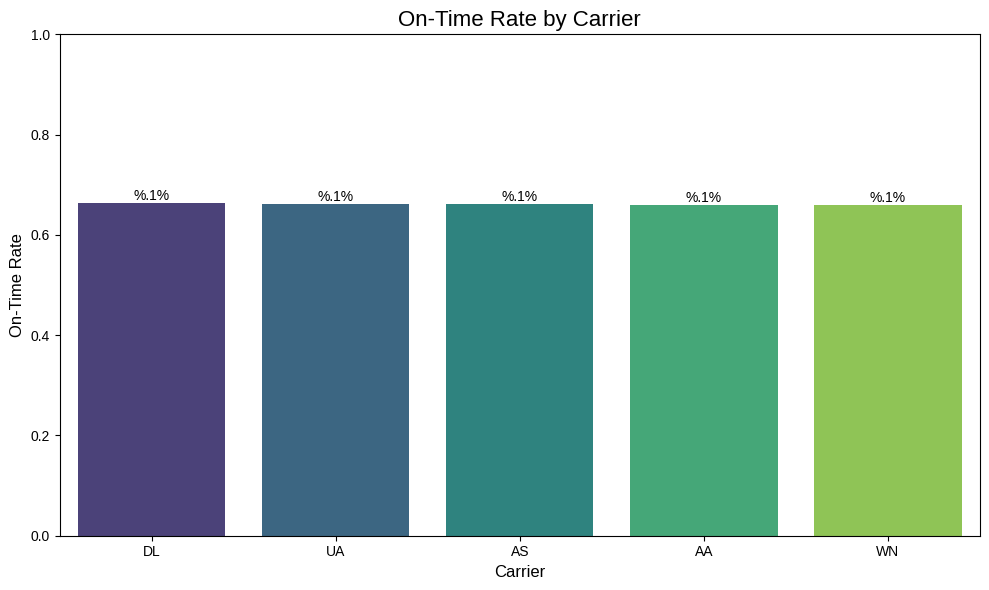

In [ ]:
# Prompt A: On-Time Rate by Carrier (Bar Chart)

# Compute On-Time Rate by carrier
on_time_rate_by_carrier = df_flights.groupby('carrier')['on_time'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=on_time_rate_by_carrier.index, y=on_time_rate_by_carrier.values, palette='viridis')

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1%')

plt.title('On-Time Rate by Carrier', fontsize=16)
plt.xlabel('Carrier', fontsize=12)
plt.ylabel('On-Time Rate', fontsize=12)
plt.ylim(0, 1) # Set y-axis limit to 0-1 for rate
plt.style.use('seaborn-v0_8-whitegrid') # Use a clean style
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### (Optional) Bring Your Own BigQuery Data
If you have airline or operations data in BigQuery, you may connect from Colab. Otherwise, skip to the **Export & Looker Studio** section.

**Auth & Client Setup (run in Colab):**
```python
from google.colab import auth
auth.authenticate_user()
print('✅ Authenticated')

from google.cloud import bigquery
client = bigquery.Client(project='YOUR_PROJECT_ID')
```

**Example Query Skeleton:**
```sql
SELECT date, carrier, origin, dest, distance_miles, seats, passengers,
       dep_delay_min, arr_delay_min, cancelled, diverted, revenue_usd, cost_usd
FROM `your_dataset.your_table`
WHERE date BETWEEN '2024-01-01' AND '2024-06-30'
```

Load to pandas:
```python
query = """
-- paste your SQL here
"""
df_bq = client.query(query).to_dataframe()
df_bq.head()
```

Unify columns with the synthetic schema if you want to reuse prompts/plots:
```python
# Example: ensure `on_time`, `load_factor`, and `casm` exist if needed
df_bq['on_time'] = (df_bq['arr_delay_min'] <= 15).astype(int)
df_bq['load_factor'] = (df_bq['passengers'] / df_bq['seats']).round(3)
df_bq['asm'] = df_bq['seats'] * df_bq['distance_miles']
df_bq['casm'] = (df_bq['cost_usd'] / df_bq['asm']).round(4)
```


### Export for Looker Studio
You can **export to CSV** and upload to Looker Studio, or you can **publish to BigQuery** and connect Looker Studio to that table.

#### Option 1 — Export CSV
Run one of the cells below to save a CSV in Colab, then download it or save to Drive.


In [ ]:
# Save synthetic dataset to CSV
df_flights.to_csv('airline_kpis_synthetic.csv', index=False)
print('📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)')

📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)


#### Option 2 — Write to BigQuery (optional)
If you prefer Looker Studio → BigQuery:

```python
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='YOUR_PROJECT_ID')
table_id = 'YOUR_PROJECT_ID.YOUR_DATASET.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)
```

**In Looker Studio:**
1. Create → Report → Add data → **BigQuery**.  
2. Select your project/dataset/table.  
3. Add charts for each KPI and configure filters (carrier, route, month).


### Dashboard Wireframe (Design First)
Sketch your intended layout before building it in Looker Studio.

```
+-----------------------------------------------------------+
| Filters: Carrier [AA/DL/UA/WN/AS] | Month [Jan–Jun]       |
+-----------------------------------------------------------+
| KPI Cards: On-Time % | Avg Delay | Cancel % | Load Factor |
+-------------------------------+---------------------------+
| Line: Avg Delay over Time     | Bar: On-Time % by Carrier |
+-------------------------------+---------------------------+
| H-Bar: Top Routes by LF       | Scatter: Cost vs Revenue  |
+-----------------------------------------------------------+
```


## Reflection & Submission

**Short Reflection (3–5 sentences):** What design decision most improved your dashboard’s clarity? What would you change next?

📝 **Your response:**
-
-

---
### Checklist
- [ ] Q1–Q3 answered in Tuesday section  
- [ ] 3–5 visualizations generated with **Gemini** in Colab  
- [ ] Synthetic or BigQuery data connected to **Looker Studio**  
- [ ] Dashboard with **filters** and **KPI cards**  
- [ ] Reflection complete  


I think that the filtering aspect added the most to my dashboard and improved the clarity. It allowed the dashboard to have a large amount of information that could be drilled down to the airline and date. This would make it more effective for different stakeholders use for key descions. In the future I would try to make the graphs more interactive and have them filter the dashboard